#Spotify API Data Report
#Hypothesis: With heavier music becoming more mainstream, other genres have had to adapt to the changing sound and population.
#In doing so, genres such as rock 'n roll have increased their loudness as well as their danceability over the years.
#Comparing Maneskin (Newer Alt Rock 'n Roll) and AC/DC (Older Rock 'n Roll)
#This data is reliable due to the information coming directly from Spotify which is a very popular streaming service.
#This data is unreliable because Spotify renews its data and so the data is newer data and not taken over the entire time that the album has been out.
# It also only has data relating to the amount of streams on Spotify and does not account for any other music streaming app. 
#Some problems with this data is that it is not completely accurate due to it being taken from only one streaming platform.
#Some other streaming platforms might have these bands under different genres than what Spotify has them under which could affect their popularity. 
#The endpoint that I will be focusing on is the spotify audio_features.

In [2]:
import pandas as pd
import json
import urllib
import base64
import requests
from matplotlib import pyplot as plt

The above code imports important libraries that are needed to run the code 

In [3]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = data, headers = header)
    print(response.status_code)
    return response.json()['access_token']

The above code creates a function that generates an access token which is needed to access the spotify data. 
It takes in the url, the data gateway, a personalized encoded key, and an authorization code and returns the response as the access key

In [4]:
keys = pd.read_csv("Spotify_Keys.txt")

Keys = the text file that has the client id as well as the client secret codes. 
Assigning these values to a variable makes it easier to use them

In [5]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


This checks to see if there are any problems associated with the keys and returns a value based on what error might occure
If there is no error, it should return a value of 200

In [6]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

Assigns different urls to variables so that they are easier to be used later in the code

In [7]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

Creates a function that takes an enpoint_url along with an api_header and returns a response code
This response code determines on whether the spotify data base was reached 
This should return a value of 200

In [8]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

Uses the access token to access the data by authenticating it

In [9]:
first_album_id = "2kcJ3TxBhSwmki0QWFXUz8"

Gets the album id from spotify and assigns that to a variable for easier use (RUSH! ARE YOU COMING? (2023))

In [10]:
second_album_id = "6mUdeDZCsExyJLMdAfDuwh"

Gets the album id from spotify and assigns that to a variable for easier use (Back In Black (1980))

In [11]:
ab_tracks_ep.format(first_album_id)

'https://api.spotify.com/v1/albums/2kcJ3TxBhSwmki0QWFXUz8/tracks'

Formats the first album id into a url that can be read

In [12]:
ab_tracks_ep.format(second_album_id)

'https://api.spotify.com/v1/albums/6mUdeDZCsExyJLMdAfDuwh/tracks'

Formats the second album id into a url that can be read

In [13]:
first_album_response = api_call(ab_tracks_ep.format(first_album_id), session_header)
second_album_response = api_call(ab_tracks_ep.format(second_album_id), session_header)

200
200


Calls into spotify to get the data for the first and the second albums and places that data into a new variable for easier use

In [14]:
first_df = pd.DataFrame(first_album_response['items'])
second_df = pd.DataFrame(second_album_response['items'])

Creates data frames that can be used and shows the first 5 tracks of the album

In [15]:
ms_track_ids = ','.join(first_df['id'].to_list())
ac_track_ids = ','.join(second_df['id'].to_list())

Joins the track ids to make a definitive list that would be easier to look at and use

In [16]:
t_features_ep + '?ids={}'.format(ms_track_ids)

'https://api.spotify.com/v1/audio-features?ids=7GJRZmyEpMIou1RqG0ebd8,5mY6WIHXoBsOCSyQxrTg0E,0cyQuiFTVaHM70y8xRsOWA,0sZHxhoBaK0YEvvMV8blr6,3wy4se12ucUNAfRwZpmDuz,1yORwrLynitfD8HoPipXlg,5FjRyRqZlgrM4tfzVhIKGA,0WbzKaO91ulIuqn3WNbEiT,17PVZrZPFBjFhNqx0YLF7o,5qFoSIpmfXexkhCpD1E1aY,6k01DY0P3ztcD75wSYWUsk,6pUcoYKUZzgBNokZ3IYCfA,1SBNKGLIg5uZgSTjZhSTMr,0JlowC3ck7YYDm1mACwHwF,3kpTSEwdJAzygDttaU0614,6nzBnBFS64mfZRHj4ncdx6,66F8TOWVZ6bAdS7oVZ52in,2uiUNqiTH1prcwDZ47OMRX,5QoKT6BRoQwtP1Z7mH7vWV,2y5ljQNRVVP1VVkHw0XsBG'

Formats the tracks and uses the session token to access their data

In [17]:
ms_track_features = api_call(t_features_ep + '?ids={}'.format(ms_track_ids), session_header)
ac_track_features = api_call(t_features_ep + '?ids={}'.format(ac_track_ids), session_header)

200
200


Calls to the Spotiy API to gather the track's features. If successful, it should return a status code.
Should return a status code of 200

In [18]:
ms_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(ms_track_ids), session_header)
ac_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(ac_track_ids), session_header)

200
200


Calls to the Spotify API to check to see if the track is within the market of the US then returns a status code
#Should return a 200

In [19]:
ms_track_features['audio_features']

[{'danceability': 0.475,
  'energy': 0.939,
  'key': 7,
  'loudness': -2.353,
  'mode': 0,
  'speechiness': 0.0798,
  'acousticness': 0.00208,
  'instrumentalness': 1.6e-06,
  'liveness': 0.159,
  'valence': 0.375,
  'tempo': 139.988,
  'type': 'audio_features',
  'id': '7GJRZmyEpMIou1RqG0ebd8',
  'uri': 'spotify:track:7GJRZmyEpMIou1RqG0ebd8',
  'track_href': 'https://api.spotify.com/v1/tracks/7GJRZmyEpMIou1RqG0ebd8',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7GJRZmyEpMIou1RqG0ebd8',
  'duration_ms': 167277,
  'time_signature': 4},
 {'danceability': 0.475,
  'energy': 0.716,
  'key': 2,
  'loudness': -4.526,
  'mode': 0,
  'speechiness': 0.0277,
  'acousticness': 0.00706,
  'instrumentalness': 7.28e-06,
  'liveness': 0.13,
  'valence': 0.217,
  'tempo': 94.967,
  'type': 'audio_features',
  'id': '5mY6WIHXoBsOCSyQxrTg0E',
  'uri': 'spotify:track:5mY6WIHXoBsOCSyQxrTg0E',
  'track_href': 'https://api.spotify.com/v1/tracks/5mY6WIHXoBsOCSyQxrTg0E',
  'analysis_url': 'htt

Shows the audio features within the album for Maneskin. Only looking for danceability, loudness, and intrumentalness

In [20]:
ms_features_df = pd.DataFrame(ms_track_features['audio_features'])
ac_features_df = pd.DataFrame(ac_track_features['audio_features'])

Creates a dataframe for both Maneskin and AC/DC based on the 'audio_features'

In [21]:
ms_tracks_df = pd.DataFrame(ms_track_info['tracks'])
ac_tracks_df = pd.DataFrame(ac_track_info['tracks'])

Creates a dataframe based off of 'tracks' for both Maneskin and AC/DC and shows the first 5 of Maneskin

In [22]:
ms_merged = pd.merge(ms_features_df, ms_tracks_df, how = 'inner', on = 'id')
ms_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.475,0.939,7,-2.353,0,0.0798,0.002080,0.000002,0.159,0.375,...,{'spotify': 'https://open.spotify.com/track/7G...,https://api.spotify.com/v1/tracks/7GJRZmyEpMIo...,False,True,HONEY (ARE U COMING?),56,https://p.scdn.co/mp3-preview/3fe024604adacec1...,1,track,spotify:track:7GJRZmyEpMIou1RqG0ebd8
1,0.475,0.716,2,-4.526,0,0.0277,0.007060,0.000007,0.130,0.217,...,{'spotify': 'https://open.spotify.com/track/5m...,https://api.spotify.com/v1/tracks/5mY6WIHXoBsO...,False,True,VALENTINE,65,https://p.scdn.co/mp3-preview/1712dcb919665a9b...,2,track,spotify:track:5mY6WIHXoBsOCSyQxrTg0E
2,0.794,0.801,11,-3.006,0,0.0603,0.001950,0.000000,0.359,0.864,...,{'spotify': 'https://open.spotify.com/track/0c...,https://api.spotify.com/v1/tracks/0cyQuiFTVaHM...,False,True,OFF MY FACE,64,https://p.scdn.co/mp3-preview/e1b3d8a2b268b17e...,3,track,spotify:track:0cyQuiFTVaHM70y8xRsOWA
3,0.321,0.827,9,-4.238,0,0.0878,0.000851,0.000000,0.306,0.333,...,{'spotify': 'https://open.spotify.com/track/0s...,https://api.spotify.com/v1/tracks/0sZHxhoBaK0Y...,False,True,THE DRIVER,63,https://p.scdn.co/mp3-preview/72be7cc52c4e5607...,4,track,spotify:track:0sZHxhoBaK0YEvvMV8blr6
4,0.604,0.542,11,-2.942,0,0.0242,0.605000,0.000000,0.171,0.463,...,{'spotify': 'https://open.spotify.com/track/3w...,https://api.spotify.com/v1/tracks/3wy4se12ucUN...,False,True,TRASTEVERE,59,https://p.scdn.co/mp3-preview/25d6ac4def73ba6f...,5,track,spotify:track:3wy4se12ucUNAfRwZpmDuz


Merges the Maneskin features and trakcs into one table and shows the first 5 tracks

In [23]:
ms_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y'],
      dtype='object')

Shows the columns that are within ms_merged

In [24]:
ac_merged = pd.merge(ac_features_df, ac_tracks_df, how = 'inner', on = 'id')
ms_merged['artist'] = "Maneskin"
ac_merged['artist'] = "AC/DC"

Merges the AC/DC features and tracks into one table
Adds the "Artist" column with "Maneskin" for their albumn
Adds the "Artist" column with "AC/DC" for their album

In [25]:
artist_compare = pd.concat([ms_merged, ac_merged], axis = 0)
artist_compare

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0.475,0.939,7,-2.353,0,0.0798,0.002080,0.000002,0.1590,0.375,...,https://api.spotify.com/v1/tracks/7GJRZmyEpMIo...,False,True,HONEY (ARE U COMING?),56,https://p.scdn.co/mp3-preview/3fe024604adacec1...,1,track,spotify:track:7GJRZmyEpMIou1RqG0ebd8,Maneskin
1,0.475,0.716,2,-4.526,0,0.0277,0.007060,0.000007,0.1300,0.217,...,https://api.spotify.com/v1/tracks/5mY6WIHXoBsO...,False,True,VALENTINE,65,https://p.scdn.co/mp3-preview/1712dcb919665a9b...,2,track,spotify:track:5mY6WIHXoBsOCSyQxrTg0E,Maneskin
2,0.794,0.801,11,-3.006,0,0.0603,0.001950,0.000000,0.3590,0.864,...,https://api.spotify.com/v1/tracks/0cyQuiFTVaHM...,False,True,OFF MY FACE,64,https://p.scdn.co/mp3-preview/e1b3d8a2b268b17e...,3,track,spotify:track:0cyQuiFTVaHM70y8xRsOWA,Maneskin
3,0.321,0.827,9,-4.238,0,0.0878,0.000851,0.000000,0.3060,0.333,...,https://api.spotify.com/v1/tracks/0sZHxhoBaK0Y...,False,True,THE DRIVER,63,https://p.scdn.co/mp3-preview/72be7cc52c4e5607...,4,track,spotify:track:0sZHxhoBaK0YEvvMV8blr6,Maneskin
4,0.604,0.542,11,-2.942,0,0.0242,0.605000,0.000000,0.1710,0.463,...,https://api.spotify.com/v1/tracks/3wy4se12ucUN...,False,True,TRASTEVERE,59,https://p.scdn.co/mp3-preview/25d6ac4def73ba6f...,5,track,spotify:track:3wy4se12ucUNAfRwZpmDuz,Maneskin
5,0.684,0.756,1,-4.783,0,0.0260,0.000926,0.000116,0.0486,0.681,...,https://api.spotify.com/v1/tracks/1yORwrLynitf...,False,True,OWN MY MIND,52,https://p.scdn.co/mp3-preview/3b6630b594c1d309...,6,track,spotify:track:1yORwrLynitfD8HoPipXlg,Maneskin
6,0.704,0.821,9,-2.974,1,0.0624,0.001810,0.000000,0.0981,0.915,...,https://api.spotify.com/v1/tracks/5FjRyRqZlgrM...,False,True,GOSSIP (feat. Tom Morello),53,https://p.scdn.co/mp3-preview/8335aa630f18a1b3...,7,track,spotify:track:5FjRyRqZlgrM4tfzVhIKGA,Maneskin
7,0.480,0.585,4,-4.196,1,0.0307,0.002770,0.000000,0.0623,0.269,...,https://api.spotify.com/v1/tracks/0WbzKaO91ulI...,False,True,TIMEZONE,52,https://p.scdn.co/mp3-preview/b66ac80d0a9b2cd8...,8,track,spotify:track:0WbzKaO91ulIuqn3WNbEiT,Maneskin
8,0.735,0.729,2,-3.338,1,0.0783,0.015700,0.000000,0.1600,0.880,...,https://api.spotify.com/v1/tracks/17PVZrZPFBjF...,False,True,BLA BLA BLA,51,https://p.scdn.co/mp3-preview/a75cab157813dfcc...,9,track,spotify:track:17PVZrZPFBjFhNqx0YLF7o,Maneskin
9,0.621,0.715,6,-4.040,0,0.0323,0.000980,0.000000,0.0781,0.598,...,https://api.spotify.com/v1/tracks/5qFoSIpmfXex...,False,True,BABY SAID,53,https://p.scdn.co/mp3-preview/61e029e6ceb86d16...,10,track,spotify:track:5qFoSIpmfXexkhCpD1E1aY,Maneskin


Final merged table that compares both albumns, added with the artist names, and adds in all of the audio feature columns.

In [26]:
artist_df_tidy = artist_compare.drop(columns = ['key', 'mode', 'uri_x', 'album', 'artists', 'href', 'preview_url', 'analysis_url', 'duration_ms_x', 'time_signature', 'tempo', 'type_x', 'id', 'track_href', 'duration_ms_y', 'explicit', 'external_ids', 'external_urls', 'speechiness', 'liveness', 'valence', 'is_local', 'is_playable', 'type_y', 'uri_y'])
artist_df_tidy
#Creates a tidy table by dropping some of the columns and leaving the columns that I want to look at.

,danceability,energy,loudness,acousticness,instrumentalness,disc_number,name,popularity,track_number,artist
0,0.475,0.939,-2.353,0.002080,0.000002,1,HONEY (ARE U COMING?),56,1,Maneskin
1,0.475,0.716,-4.526,0.007060,0.000007,1,VALENTINE,65,2,Maneskin
2,0.794,0.801,-3.006,0.001950,0.000000,1,OFF MY FACE,64,3,Maneskin
3,0.321,0.827,-4.238,0.000851,0.000000,1,THE DRIVER,63,4,Maneskin
4,0.604,0.542,-2.942,0.605000,0.000000,1,TRASTEVERE,59,5,Maneskin
5,0.684,0.756,-4.783,0.000926,0.000116,1,OWN MY MIND,52,6,Maneskin
6,0.704,0.821,-2.974,0.001810,0.000000,1,GOSSIP (feat. Tom Morello),53,7,Maneskin
7,0.480,0.585,-4.196,0.002770,0.000000,1,TIMEZONE,52,8,Maneskin
8,0.735,0.729,-3.338,0.015700,0.000000,1,BLA BLA BLA,51,9,Maneskin
9,0.621,0.715,-4.040,0.000980,0.000000,1,BABY SAID,53,10,Maneskin


Some of the things that were hard to work with was the Spotify keys with their need to be exact. After getting the keys to work, the rest of the project was relatively easy to work through since much of the information was pulled from previous exercises and notes from class. Some limitations within the data is that spotify deletes data after a specific amount of time so there is a chance that the data is not entirely accurate. I chose these two alubms since they are categorized within the same genre of music, but from different time periods. I wanted to show how the genre has changed over time while also showing how some characteristics have stayed the same over the years.

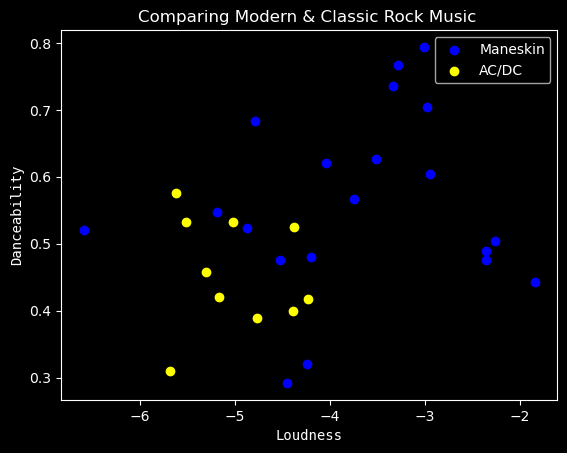

In [43]:
mane = artist_df_tidy[artist_df_tidy['artist']=='Maneskin']
acdc = artist_df_tidy[artist_df_tidy['artist']=='AC/DC']

plt.style.use('dark_background')

fig1, ax1 = plt.subplots()
ax1.scatter(mane['loudness'], mane['danceability'], color = 'blue')
ax1.scatter(acdc['loudness'], acdc['danceability'], color = 'yellow')

ax1.set_xlabel( "Loudness", family= "monospace")
ax1.set_ylabel( "Danceability", family= "monospace" )
ax1.set_title ("Comparing Modern & Classic Rock Music ", family= "sans-serif")
ax1.legend(["Maneskin" , "AC/DC"])

plt.show()

The graph above is comparing the RUSH! (ARE YOU COMING?) album from Maneskin and the "Back In Black" album from AC/DC based on their loudness and danceability. Loudness works on a decimal decible system where, according to Spotify, majority of songs fall into the -60 to 0 decible range where 0 is very quiet and -1 is very loud. Danceability works by having songs with high danceability closer to 1 and songs with low danceability closer to 0. Based on the information depicted in the figure above, there is a correlation with modern rock having a higher danceability versus classic rock. However, classic rock has an overall higher loudness score than that of modern rock. With Maneskin having more than double the amount of songs than AC/DC for the albums that are tested, it makes sense that Maneskin has a higher variety of both danceability and loudness compared to AC/DC with only one of Maneskin's songs slated as the loudest song in this data sample. Many of Maneskin's songs are grouped around high danceability with low loudness while AC/DC is grouped around low to mid danceability but with mid to high loudness. With the observations made, my original hypothesis of genres such as rock 'n roll increasing their loudness as well as their danceability over the years shows to have some valitity but ultimately can not be proven. However, it is true that more modern rock has adapted to have a higher danceability and to have a higher variety of sound acorss their albums. If I were to retest and ellaborate on this hypothesis, I would need to use more albums to compare so that I could get a greater data pool to sample from. One thing that I would do differently would be to set a year gap between albums so that it would be easier to judge the genre's adaptation over a given amount of time (i.e. find an album that came out exactly 40 years before the other to compare). 